# **Práctica 4: Métricas de distancia (datos estandarizados)**

Nombre: Humberto Ignacio Hernández Olvera

Número de cuenta: 309068165

Email: humberto1nacho@gmail.com

**Objetivo.** Obtener las matrices de distancia (Euclidiana, Chebyshev, Manhattan, Minkowski) a partir de una matriz de datos.


**Fuente de datos:**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

* IDNumber: Identifica al paciente
* Diagnosis: Diagnóstico (M=Maligno, B=Benigno) 
* Radius: Media de las distancias del centro y puntos del perímetro
* Texture: Desviación estándar de la escala de grises
* Perimeter: Valor del perímetro del cáncer de mama
* Area: Valor del área del cáncer de mama
* Smoothness: Variación de la longitud del radio
* Compactness: Perímetro^2 / Area - 1
* Concavity: Capida o gravedad de las curvas de nivel
* Concave points: Número de sectores de contorno cóncavo
* Symmetry: Simetría de la imagen
* Fractal dimension: "Aproximación de frontera" - 1


#### **1) Importar las bibliotecas necesarias**


In [1]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para generar gráficas a partir de los datos
from scipy.spatial.distance import cdist    # Para el cálculo de distancias
from scipy.spatial import distance
import seaborn as sns
%matplotlib inline

#### **2) Importar los datos**

In [2]:
Diagnosticos = pd.read_csv("WDBCOriginal.csv")
Diagnosticos

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
Diagnosticos.dtypes

IDNumber             object
Diagnosis            object
Radius              float64
Texture             float64
Perimeter           float64
Area                float64
Smoothness          float64
Compactness         float64
Concavity           float64
ConcavePoints       float64
Symmetry            float64
FractalDimension    float64
dtype: object

In [4]:
Diagnosticos.isnull().sum()

IDNumber            0
Diagnosis           0
Radius              0
Texture             0
Perimeter           0
Area                0
Smoothness          0
Compactness         0
Concavity           0
ConcavePoints       0
Symmetry            0
FractalDimension    0
dtype: int64

Podemos ver que no se tiene ningun valor de tipo nulo.

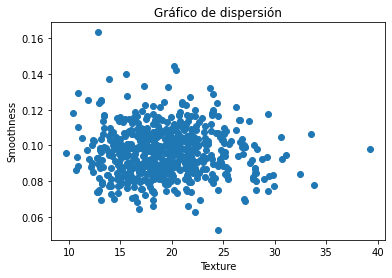

In [5]:
plt.plot(Diagnosticos['Texture'],Diagnosticos['Smoothness'],'o')
plt.title('Gráfico de dispersión')
plt.xlabel('Texture')
plt.ylabel('Smoothness')
plt.show()

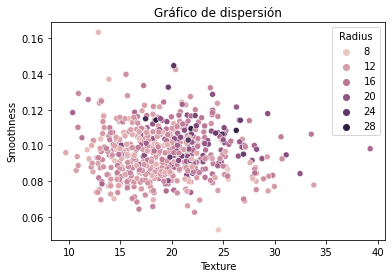

In [6]:
sns.scatterplot(x='Texture', y='Smoothness', data=Diagnosticos, hue='Radius')
plt.title('Gráfico de dispersión')
plt.xlabel('Texture')
plt.ylabel('Smoothness')
plt.show()

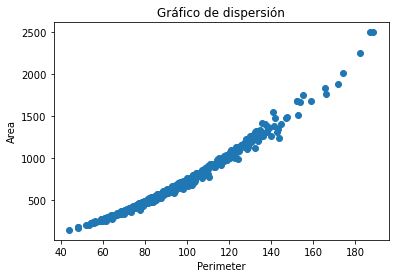

In [7]:
plt.plot(Diagnosticos['Perimeter'],Diagnosticos['Area'],'o')
plt.title('Gráfico de dispersión')
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.show()

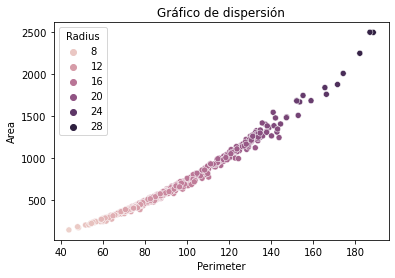

In [8]:
sns.scatterplot(x='Perimeter', y='Area', data=Diagnosticos, hue='Radius')
plt.title('Gráfico de dispersión')
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.show()

In [9]:
Diagnosticos.corr()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


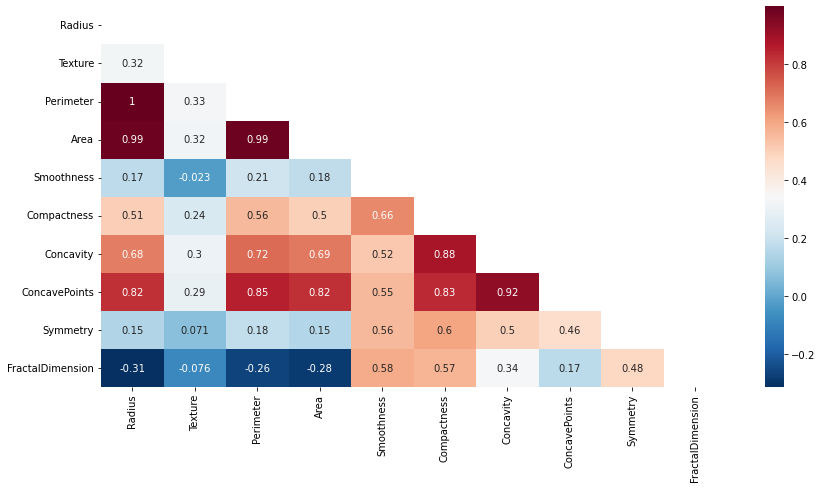

In [10]:
plt.figure(figsize=(14,7))
MatrizTnf=np.triu(Diagnosticos.corr())
sns.heatmap(Diagnosticos.corr(),cmap='RdBu_r', annot=True, mask=MatrizTnf)
plt.show()

Como se observa en el mapa de calor, el perímetro y el área tienen una gran dependencia entre sí debido al radio, y la variable concavity con concavepoints. Se hará la eliminación de las variables perímetro y área con base en el análisis correlacional.

In [15]:
Diagnosticos = Diagnosticos.drop(columns=['Perimeter','Area']) # Se eliminan las variables con alto grado de similitud

In [16]:
Diagnosticos = Diagnosticos.drop(columns=['IDNumber','Diagnosis']) # Se eliminan las columnas que no son numéricas

Habiendo aplicado el análisis correlacional de los datos, se procede a su estandarización.

**Estandarización de datos**

En los algoritmos basados en distancias es fundamental escalar o normalizar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()   
# Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(Diagnosticos)         # Se calculan la media y desviación y se escalan los datos

In [19]:
pd.DataFrame(MEstandarizada) 

,0,1,2,3,4,5,6,7
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


#### **3) Matrices de distancia**

**a) Matriz de distancias: Euclidiana**

In [20]:
DstEuclidiana = cdist(MEstandarizada, MEstandarizada, metric='euclidean')
MEuclidiana = pd.DataFrame(DstEuclidiana)

In [21]:
print(MEuclidiana)
#MEuclidiana 

           0         1         2          3         4         5         6    \
0     0.000000  7.016066  4.752094   4.586539  5.121488  4.040492  6.440001   
1     7.016066  0.000000  3.385821   9.238342  2.395340  5.236969  1.286614   
2     4.752094  3.385821  0.000000   7.007915  2.148311  3.816713  2.554330   
3     4.586539  9.238342  7.007915   0.000000  8.004568  4.594912  8.390649   
4     5.121488  2.395340  2.148311   8.004568  0.000000  4.129082  2.055532   
..         ...       ...       ...        ...       ...       ...       ...   
564   5.967140  3.515208  1.825196   8.286853  2.382856  4.970062  2.859779   
565   7.285343  2.856078  2.710079   8.830511  3.405628  5.463609  2.167251   
566   8.107668  2.843777  4.054201   9.314791  4.143188  5.748845  2.287540   
567   4.680174  7.113734  4.062627   5.752871  5.797096  5.595192  6.258826   
568  10.325872  5.159129  7.315014  11.124121  6.836509  7.614335  5.169956   

          7         8         9    ...       559   

In [22]:
print(MEuclidiana.round(3))

        0      1      2       3      4      5      6      7      8      9    \
0     0.000  7.016  4.752   4.587  5.121  4.040  6.440  4.979  4.068  4.330   
1     7.016  0.000  3.386   9.238  2.395  5.237  1.287  4.615  5.579  6.307   
2     4.752  3.386  0.000   7.008  2.148  3.817  2.554  3.545  3.370  4.337   
3     4.587  9.238  7.008   0.000  8.005  4.595  8.391  5.089  4.120  3.676   
4     5.121  2.395  2.148   8.005  0.000  4.129  2.056  4.225  4.569  5.296   
..      ...    ...    ...     ...    ...    ...    ...    ...    ...    ...   
564   5.967  3.515  1.825   8.287  2.383  4.970  2.860  4.862  4.773  5.439   
565   7.285  2.856  2.710   8.831  3.406  5.464  2.167  4.614  5.062  5.617   
566   8.108  2.844  4.054   9.315  4.143  5.749  2.288  4.727  5.626  5.881   
567   4.680  7.114  4.063   5.753  5.797  5.595  6.259  5.416  4.194  4.191   
568  10.326  5.159  7.315  11.124  6.837  7.614  5.170  6.688  7.904  8.027   

     ...    559    560     561    562    563    564

Matriz de distancias de una parte del total de objetos

In [23]:
DstEuclidiana = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='euclidean')
MEuclidiana = pd.DataFrame(DstEuclidiana)
print(MEuclidiana) 

          0         1         2         3         4         5         6  \
0  0.000000  7.016066  4.752094  4.586539  5.121488  4.040492  6.440001   
1  7.016066  0.000000  3.385821  9.238342  2.395340  5.236969  1.286614   
2  4.752094  3.385821  0.000000  7.007915  2.148311  3.816713  2.554330   
3  4.586539  9.238342  7.007915  0.000000  8.004568  4.594912  8.390649   
4  5.121488  2.395340  2.148311  8.004568  0.000000  4.129082  2.055532   
5  4.040492  5.236969  3.816713  4.594912  4.129082  0.000000  4.375568   
6  6.440001  1.286614  2.554330  8.390649  2.055532  4.375568  0.000000   
7  4.978613  4.615195  3.545278  5.088560  4.225424  1.766159  3.742332   
8  4.068246  5.578802  3.369686  4.119834  4.569281  1.871044  4.585705   
9  4.330254  6.306882  4.337093  3.676230  5.296155  2.747927  5.301146   

          7         8         9  
0  4.978613  4.068246  4.330254  
1  4.615195  5.578802  6.306882  
2  3.545278  3.369686  4.337093  
3  5.088560  4.119834  3.676230  
4  4

Distancia entre dos objetos

In [24]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstEuclidiana = distance.euclidean(Objeto1,Objeto2)
dstEuclidiana 

7.016065813699803

**b) Matriz de distancias: Chebyshev**

In [25]:
DstChebyshev = cdist(MEstandarizada, MEstandarizada, metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)

In [26]:
print(MChebyshev)

          0         1         2         3         4         5         6    \
0    0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1    3.770586  0.000000  1.769173  5.779572  1.394857  3.064384  0.703826   
2    2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.390296   
3    2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4    2.818197  1.394857  1.608003  5.473369  0.000000  2.452455  1.312466   
..        ...       ...       ...       ...       ...       ...       ...   
564  3.186774  1.971130  1.252274  5.841946  1.873289  2.821032  1.674029   
565  4.158469  2.438766  1.628947  5.969531  3.236950  2.948616  1.924485   
566  4.118909  2.399206  1.931453  5.806506  3.197390  3.077905  1.884924   
567  4.409792  3.759215  2.219218  3.867224  3.488274  3.171792  3.183849   
568  4.680551  3.638222  4.054295  6.395638  3.558698  5.349506  2.988949   

          7         8         9    ...       559       560       561  \
0  

Matriz de distancias de una parte del total de objetos

In [27]:
DstChebyshev = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)
print(MChebyshev)

          0         1         2         3         4         5         6  \
0  0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1  3.770586  0.000000  1.769173  5.779572  1.394857  3.064384  0.703826   
2  2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.390296   
3  2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4  2.818197  1.394857  1.608003  5.473369  0.000000  2.452455  1.312466   
5  2.039179  3.064384  2.288013  3.020914  2.452455  0.000000  2.652337   
6  3.195219  0.703826  1.390296  5.673251  1.312466  2.652337  0.000000   
7  2.591848  2.529006  2.058361  3.250566  2.222803  1.193785  2.422685   
8  2.662165  3.028801  1.970470  3.338458  2.134912  1.424165  2.334794   
9  3.178774  3.651748  3.181104  2.127824  3.345546  1.940774  3.545428   

          7         8         9  
0  2.591848  2.662165  3.178774  
1  2.529006  3.028801  3.651748  
2  2.058361  1.970470  3.181104  
3  3.250566  3.338458  2.127824  
4  2

Distancia entre dos objetos

In [28]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstChebyshev = distance.chebyshev(Objeto1,Objeto2)
dstChebyshev

3.7705863435627216

**c) Matriz de distancias: Manhattan**

In [29]:
DstManhattan = cdist(MEstandarizada, MEstandarizada, metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)

In [30]:
print(MManhattan)

           0          1          2          3          4          5    \
0     0.000000  18.620047  11.585416  11.150307  13.038137  10.591820   
1    18.620047   0.000000   8.654270  22.695460   5.603816  12.513015   
2    11.585416   8.654270   0.000000  15.617146   4.683794   8.897888   
3    11.150307  22.695460  15.617146   0.000000  18.709918  11.145850   
4    13.038137   5.603816   4.683794  18.709918   0.000000   9.781161   
..         ...        ...        ...        ...        ...        ...   
564  14.033795   8.051522   4.382722  18.695767   5.456088  13.081346   
565  18.511790   5.803821   6.926374  21.372473   5.564537  13.282785   
566  21.455783   5.338900  10.836015  23.526907   9.724111  14.559192   
567   7.267972  18.290216  10.135811  13.764145  14.463722  14.468925   
568  28.731816  12.192523  18.112049  27.860553  17.002980  19.477907   

           6          7          8          9    ...        559        560  \
0    16.732910  12.078288  10.063035   9.9360

Matriz de distancias de una parte del total de objetos

In [31]:
DstManhattan = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)
print(MManhattan)

           0          1          2          3          4          5  \
0   0.000000  18.620047  11.585416  11.150307  13.038137  10.591820   
1  18.620047   0.000000   8.654270  22.695460   5.603816  12.513015   
2  11.585416   8.654270   0.000000  15.617146   4.683794   8.897888   
3  11.150307  22.695460  15.617146   0.000000  18.709918  11.145850   
4  13.038137   5.603816   4.683794  18.709918   0.000000   9.781161   
5  10.591820  12.513015   8.897888  11.145850   9.781161   0.000000   
6  16.732910   3.047134   6.556530  19.779759   4.853551  10.625878   
7  12.078288  11.000639   8.124921  12.436645  11.395766   4.264835   
8  10.063035  14.543144   7.950716   8.822511  11.417034   4.012202   
9   9.936044  15.826506   9.647951   8.572367  12.814429   6.008229   

           6          7          8          9  
0  16.732910  12.078288  10.063035   9.936044  
1   3.047134  11.000639  14.543144  15.826506  
2   6.556530   8.124921   7.950716   9.647951  
3  19.779759  12.436645   

Distancia entre dos objetos

In [32]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstManhattan = distance.cityblock(Objeto1,Objeto2)
dstManhattan

18.620047256603765

**d) Matriz de distancias: Minkowski**

In [33]:
DstMinkowski = cdist(MEstandarizada, MEstandarizada, metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)

In [34]:
print(MMinkowski)

           0          1         2          3          4          5    \
0     0.000000   9.635120  6.287481   6.080260   6.890206   5.524724   
1     9.635120   0.000000  4.579771  12.269150   3.147722   6.881577   
2     6.287481   4.579771  0.000000   8.920553   2.718821   4.987281   
3     6.080260  12.269150  8.920553   0.000000  10.455040   6.054958   
4     6.890206   3.147722  2.718821  10.455040   0.000000   5.392224   
..         ...        ...       ...        ...        ...        ...   
564   7.814077   4.558077  2.394075  10.669552   3.038869   6.780314   
565   9.811792   3.471362  3.663504  11.658466   3.795348   7.251852   
566  11.153509   3.397489  5.586955  12.482435   5.348386   7.724256   
567   5.191153   9.696519  5.438109   7.556388   7.772010   7.591034   
568  14.484108   6.715256  9.790784  14.902813   9.194000  10.220293   

           6         7          8          9    ...        559        560  \
0     8.812099  6.616683   5.411946   5.586518  ...  10.62

Matriz de distancias de una parte del total de objetos

In [35]:
DstMinkowski = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)
print(MMinkowski)

          0          1         2          3          4         5          6  \
0  0.000000   9.635120  6.287481   6.080260   6.890206  5.524724   8.812099   
1  9.635120   0.000000  4.579771  12.269150   3.147722  6.881577   1.690254   
2  6.287481   4.579771  0.000000   8.920553   2.718821  4.987281   3.458242   
3  6.080260  12.269150  8.920553   0.000000  10.455040  6.054958  10.975503   
4  6.890206   3.147722  2.718821  10.455040   0.000000  5.392224   2.687285   
5  5.524724   6.881577  4.987281   6.054958   5.392224  0.000000   5.782465   
6  8.812099   1.690254  3.458242  10.975503   2.687285  5.782465   0.000000   
7  6.616683   6.090396  4.607157   6.756457   5.841877  2.322600   4.882063   
8  5.411946   7.601485  4.415136   5.117344   6.153569  2.338082   6.179143   
9  5.586518   8.458919  5.511341   4.781310   6.989878  3.498116   6.997519   

          7         8         9  
0  6.616683  5.411946  5.586518  
1  6.090396  7.601485  8.458919  
2  4.607157  4.415136  5.511

Distancia entre dos objetos

In [36]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstMinkowski = distance.minkowski(Objeto1,Objeto2, p=1.5)
dstMinkowski

9.635120254412774